# HW5

For this homework, we are going to work with [*Indoor User Movement Prediction from RSS data*](https://archive.ics.uci.edu/ml/datasets/Indoor+User+Movement+Prediction+from+RSS+data) dataset from UCI.  The homework is due Friday, December 21st midnight. 

## Task 1

Download the dataset and unzip it in under a subdirectory of `data` folder named `rss_data`.

The files we are interested is in the subfolder `dataset`.  Each of these files whose names that start with `MovementAAL_RSS_` contain data collected from indivuduals. Each of these files represent a single data point.  There are 314 of these files, and hence, you have 314 data points.  Each file has 4 columns but the number of rows change from file to file.  

There is also a file named `MovementALL_target.csv` in that folder. This file tells us the class each of these measurements are assigned. Some of these measurements are labelled with +1 and some are labelled with -1.

## Task 2

Construct a SVM model that separates +1 labelled data points from -1 data points.  You must first solve the problem that these datapoints do not have the same number of rows even though they all have the same number of columns. 

## Task 3

Using [Keras](https://keras.io/getting-started/sequential-model-guide/) write a neural network model that separates +1 labelled data points from -1 data points.

## Notes

1. You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it.  All of these must be explained and documented.  Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.

1. You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

3. Put the data in a separate subfolder of your `data` folder and rename it `rss_data`. I'll take points off if the data is not saved under the correct place.

1. For both of Task 2 and Task 3, you must split your data into a train and test set, and then evaluate the accuracy of your model on the test set.



In [177]:
#Importing libraries that I need
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [178]:
from tensorflow.python.keras.layers import Input, Dense
from keras.layers import Dense
from keras.models import Sequential
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from os import listdir
from numpy import vstack, array
from matplotlib import pyplot
from sklearn.svm import SVC

In [179]:
#Imported my data here, by panda read csv command

data=pd.read_csv("..\\data\\rss_data\\dataset\\MovementAAL_target.csv", 
                             names=('sequence_ID', 'class_label'), 
                             skiprows=(1))

In [189]:
#took all the data with for loop
sequ = list()
directory = "..\\data\\rss_data\\dataset\\"
target_mapping = None
for name in listdir(directory):
    filename = directory + '/' + name
    if filename.endswith('_target.csv'):
        continue
    df = read_csv(filename, header=0)
    values = df.values
    sequ.append(values)

# loading dataset
sequ, targets, groups, paths = load_dataset()
# The shape of the loaded data
print(len(sequ), targets.shape, groups.shape, paths.shape)

314 (314,) (314,) (314,)


In [190]:
#tried to model my data with linear modeling by using the course source and made a confusion matrixes
classifier = svm.SVC(kernel='linear')
sequ = data.iloc[:,:]
ys = data.iloc[:,1]

train_sequ, test_sequ, train_ys, test_ys = train_test_split(sequ,ys,test_size=0.25)
classifier.fit(train_sequ,train_ys)

predicted_ys = classifier.predict(test_sequ)
confusion_matrix(test_ys,predicted_ys)

array([[43,  0],
       [ 0, 36]], dtype=int64)

Class=-1: 156 49.682%
Class=+1: 158 50.318%


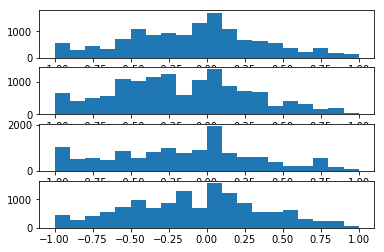

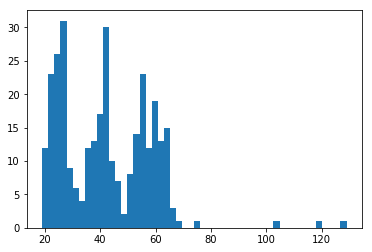

In [191]:
# summarize class breakdown
class1,class2 = len(targets[targets==-1]), len(targets[targets==1])
print('Class=-1: %d %.3f%%' % (class1, class1/len(targets)*100))
print('Class=+1: %d %.3f%%' % (class2, class2/len(targets)*100))
# histogram for each anchor point
all_rows = vstack(sequ)
pyplot.figure()
variables = [0, 1, 2, 3]
for v in variables:
    pyplot.subplot(len(variables), 1, v+1)
    pyplot.hist(all_rows[:, v], bins=20)
pyplot.show()
# histogram for trace lengths
trace_lengths = [len(x) for x in sequ]
pyplot.hist(trace_lengths, bins=50)
pyplot.show()

['SVM']